In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')



In [69]:
df = pd.read_csv('data/marketing_data.csv')

In [70]:
mkt = df.copy()
mkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [71]:
mkt = mkt.rename(columns={' Income ':'Income', 'Dt_Customer':'Year_Joined'}).drop('ID', axis=1)
mkt['Income'] = mkt['Income'].str.replace('\$|,', '', regex = True)
mkt['Income'] = mkt['Income'].astype(float)

mkt['Year_Joined'] = pd.DatetimeIndex(mkt['Year_Joined']).year.astype(int)

mkt['ChildrenHome'] = np.where(mkt['Kidhome'] > 0, 1, np.where(mkt['Teenhome'] > 0,1,0))

mkt['MntTotal'] = mkt['MntWines'] + mkt['MntFishProducts'] + mkt['MntFruits'] + mkt['MntGoldProds'] + mkt['MntMeatProducts'] + mkt['MntSweetProducts']
mkt['NumPurchasesTotal'] = mkt['NumCatalogPurchases'] + mkt['NumDealsPurchases'] + mkt['NumStorePurchases'] + mkt['NumWebPurchases']
mkt['AcceptedCmpTotal'] = mkt['AcceptedCmp1'] + mkt['AcceptedCmp2'] + mkt['AcceptedCmp3'] + mkt['AcceptedCmp4'] + mkt['AcceptedCmp5']

# Encoding Categoricals

# Collapse countries into binary 'SP or not'
mkt['Country_SP'] = np.where(mkt['Country'] == 'SP', 1, 0)

# Ordinal/Label Encoding, retain
mkt['Education'] = mkt['Education'].replace('2n Cycle', 'Master')
mkt['Education_Enc'] = mkt['Education'].replace(['Basic', 'Graduation', 'Master', 'PhD'], [0,1,2,3])

# One-hot encoding, drop first
mkt['Marital_Status'] = mkt['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone', 'Widow'], ['Single']*3 + ['Divorced'])
mkt = mkt.join(pd.get_dummies(mkt.Marital_Status, drop_first=True, columns=['Divorced', 'Single', 'Together','Married'],prefix='Marital'))



totals = ['AcceptedCmpTotal', 'MntTotal', 'NumPurchasesTotal']
exclude = ['Kidhome', 'Teenhome', 'Country', 'Education', 'Marital_Status']
cats = ['Country', 'Education', 'Marital_Status', ]
newfeats = ['ChildrenHome', 'Country_SP', 'Education_Enc', 'Marital_Married', 'Marital_Single', 'Marital_Together']

In [72]:
cols = ['Response',  'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpTotal',
        'Year_Joined', 'Recency', 'Complain','NumWebVisitsMonth',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntWines', 'MntFruits', 'MntTotal',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumPurchasesTotal',
        'Year_Birth', 'Income',
        'Kidhome', 'Teenhome', 'ChildrenHome',
        'Country', 'Country_SP',
        'Education', 'Education_Enc',
        'Marital_Status', 'Marital_Married', 'Marital_Single', 'Marital_Together']

mkt = mkt[cols]
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
Response               2240 non-null int64
AcceptedCmp1           2240 non-null int64
AcceptedCmp2           2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           2240 non-null int64
AcceptedCmp5           2240 non-null int64
AcceptedCmpTotal       2240 non-null int64
Year_Joined            2240 non-null int64
Recency                2240 non-null int64
Complain               2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntTotal               2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-n

In [73]:
mkt['MntTotal'].sum()

1356988

In [74]:
mkt.head()

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTotal,Year_Joined,Recency,Complain,...,Teenhome,ChildrenHome,Country,Country_SP,Education,Education_Enc,Marital_Status,Marital_Married,Marital_Single,Marital_Together
0,1,0,0,0,0,0,0,2014,0,0,...,0,0,SP,1,Graduation,1,Divorced,0,0,0
1,1,0,1,0,0,0,1,2014,0,0,...,0,0,CA,0,Graduation,1,Single,0,1,0
2,0,0,0,0,0,0,0,2014,0,0,...,1,1,US,0,Graduation,1,Married,1,0,0
3,0,0,0,0,0,0,0,2014,0,0,...,1,1,AUS,0,Graduation,1,Together,0,0,1
4,1,0,0,1,0,0,1,2014,0,0,...,0,1,SP,1,Graduation,1,Single,0,1,0


In [75]:
#check for missing values
mkt[mkt.isna().any(axis=1)]

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTotal,Year_Joined,Recency,Complain,...,Teenhome,ChildrenHome,Country,Country_SP,Education,Education_Enc,Marital_Status,Marital_Married,Marital_Single,Marital_Together
134,0,0,0,0,0,0,0,2012,4,0,...,1,1,GER,0,PhD,3,Married,1,0,0
262,0,0,0,0,0,0,0,2013,11,0,...,0,1,US,0,Graduation,1,Married,1,0,0
394,0,0,0,0,0,0,0,2014,17,0,...,0,1,AUS,0,PhD,3,Together,0,0,1
449,0,0,0,0,0,0,0,2013,19,0,...,0,1,AUS,0,Graduation,1,Single,0,1,0
525,0,0,0,0,0,0,0,2013,23,0,...,1,1,CA,0,PhD,3,Married,1,0,0
590,0,0,0,0,0,0,0,2012,25,0,...,0,1,GER,0,Master,2,Married,1,0,0
899,0,0,0,0,0,0,0,2013,39,0,...,1,1,US,0,Master,2,Together,0,0,1
997,0,0,0,0,0,0,0,2014,45,0,...,1,1,GER,0,Graduation,1,Single,0,1,0
1096,0,0,0,0,0,0,0,2014,49,0,...,1,1,AUS,0,Master,2,Single,0,1,0
1185,0,0,0,0,0,0,0,2013,52,0,...,1,1,AUS,0,Master,2,Together,0,0,1


Income is typically an important metric in marketing analysis, so I want to carefully consider how to handle these missing values

The distribution is as expected, skewed right with an outlier on the high end. The Median would certainly be favorable over Mean for imputation.
However, Income has a fairly high correlation with several variables, so I will consider regression imputation.

In [76]:
#correlations with income sorted by abs value
IncomeCorr = mkt.corrwith(mkt["Income"])
temp = IncomeCorr.abs().sort_values(ascending=False)
IncomeCorr = IncomeCorr.reindex(index=temp.index)
IncomeCorr

Income                 1.000000
MntTotal               0.667576
NumCatalogPurchases    0.589162
MntMeatProducts        0.584633
MntWines               0.578650
NumPurchasesTotal      0.566873
NumWebVisitsMonth     -0.553088
NumStorePurchases      0.529362
MntSweetProducts       0.440744
MntFishProducts        0.438871
MntFruits              0.430842
Kidhome               -0.428669
NumWebPurchases        0.387878
ChildrenHome          -0.338153
AcceptedCmp5           0.335943
MntGoldProds           0.325916
AcceptedCmpTotal       0.308381
AcceptedCmp1           0.276820
AcceptedCmp4           0.184400
Year_Birth            -0.161791
Response               0.133047
Education_Enc          0.102378
AcceptedCmp2           0.087545
NumDealsPurchases     -0.083101
Complain              -0.027225
Country_SP            -0.026761
Marital_Single        -0.025390
Marital_Together       0.023425
Year_Joined            0.022451
Teenhome               0.019133
Marital_Married       -0.016479
Accepted

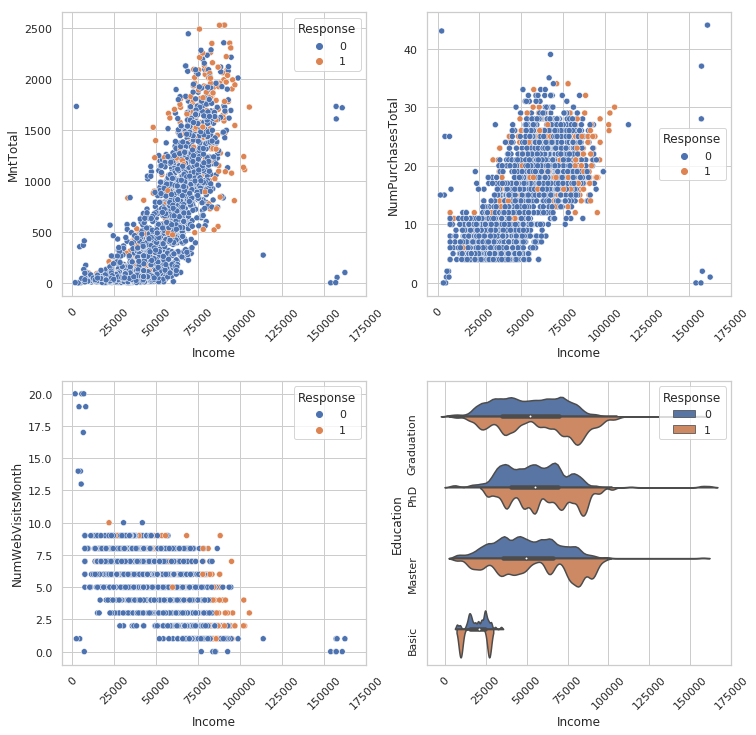

In [77]:
mkt_no_out = mkt[mkt.Income < mkt['Income'].max()]

fig, ax = plt.subplots(2,2,figsize=(12,12))
ax = ax.flatten()

sns.scatterplot(data=mkt_no_out, x='Income', y= 'MntTotal', hue = 'Response', ax = ax[0])

sns.scatterplot(data=mkt_no_out, x='Income', y= 'NumPurchasesTotal', hue = 'Response', ax = ax[1])

sns.scatterplot(data=mkt_no_out, x='Income', y= 'NumWebVisitsMonth', hue = 'Response', ax = ax[2])


sns.violinplot(orient='h', data=mkt_no_out, x = 'Income', y = 'Education', hue = 'Response', split = True, bw= 0.1, ax = ax[3])
plt.sca(ax[3])
plt.yticks(rotation = 90)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(ticks=list(range(0, 200000, 25000)),rotation=45)
    plt.subplots_adjust(hspace=0.3)

plt.savefig('.//images//IncomeCorrelations.png')

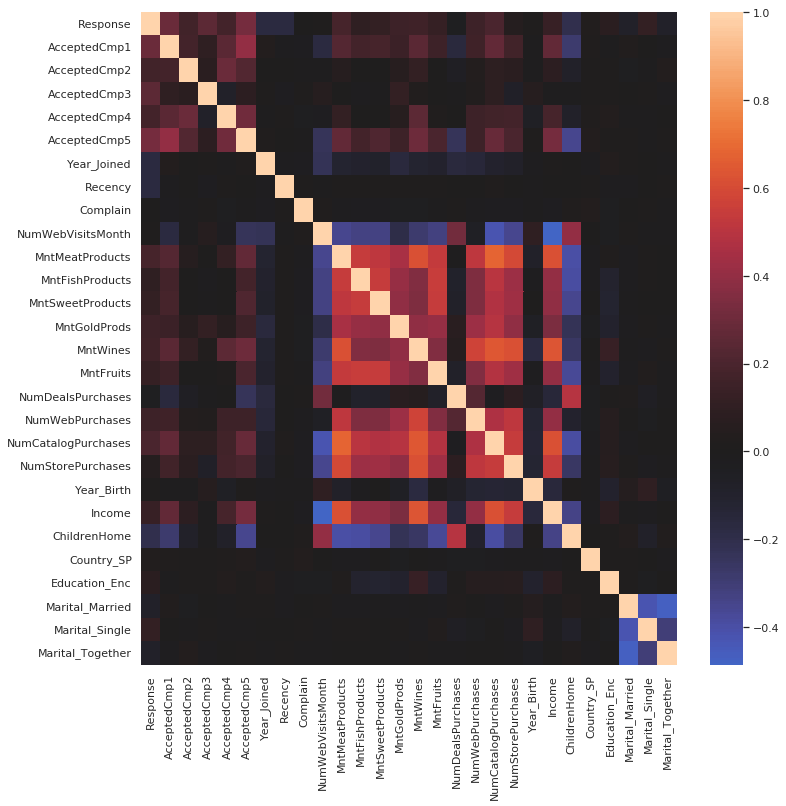

In [78]:
mkt_nonan = mkt_no_out[mkt_no_out['Income'].notna()]
mkt_nonan.drop(cats + ['MntTotal', 'NumPurchasesTotal', 'AcceptedCmpTotal', 'Kidhome', 'Teenhome'], axis=1, inplace=True)
corrs = mkt_nonan.corr(method = 'kendall')

# plot clustered heatmap of correlations
plt.figure(figsize=(12,12))
sns.heatmap(corrs, center = 0)
plt.savefig('.//images//CorrHeatmap.png')

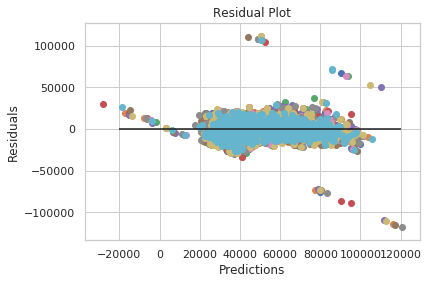

 Mean training R-squared over 10 folds: 0.7678153341861875
 Mean testing R-squared over 10 folds: 0.733604160869701


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

mkt_nans = mkt[mkt['Income'].isna()].drop(['Income', 'MntTotal', 'NumPurchasesTotal', 'AcceptedCmpTotal', 'Kidhome', 'Teenhome'] + cats, axis = 1)

X = mkt_nonan.drop(['Income'], axis = 1)
y = mkt_nonan['Income']

train_scores = []
test_scores = []
imputations = pd.DataFrame(index=mkt_nans.index)
folds = 10

for i in range(folds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf = LinearRegression()
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    pred = clf.predict(mkt_nans)


    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))
    imputations[str(i)] = pred

    residual = y_test-y_test_pred
    plt.scatter(y_test_pred, residual)

    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')




plt.hlines(y=0,xmin=-20000, xmax=120000)
plt.show()


print(f' Mean training R-squared over {folds} folds: {np.mean(train_scores)}')
print(f' Mean testing R-squared over {folds} folds: {np.mean(test_scores)}')


In [80]:
imputations['Income'] = np.mean(imputations, axis = 1)

mkt.loc[imputations.index,'Income'] = imputations.Income

print(f'Mean Income predictions imputed: \n{imputations.Income}')

Mean Income predictions imputed: 
134     47050.845862
262     30370.888146
394     35907.316038
449     81983.537108
525     51836.963687
590     32440.952778
899     49830.090717
997     33267.568616
1096    34072.148716
1185    65097.108989
1213    83280.196087
1312    34760.057560
1515    57413.034966
1558    80283.169864
1693    88160.997921
1804    51187.070899
1858    38817.902070
1863    30859.508193
1880    44372.950385
1967    67653.694738
1983    38368.141368
2139    43370.205960
2165    40875.467203
2170    62776.887555
Name: Income, dtype: float64


With the missing values handled lets continue with other exploration

In [81]:
corrs = mkt.corrwith(mkt["Response"])
temp = corrs.abs().sort_values(ascending=False)
corrs = corrs.reindex(index=temp.index)
corrs

Response               1.000000
AcceptedCmpTotal       0.426035
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
MntTotal               0.265298
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
ChildrenHome          -0.205134
Recency               -0.198437
AcceptedCmp4           0.177019
Year_Joined           -0.171030
AcceptedCmp2           0.169293
NumPurchasesTotal      0.155138
Teenhome              -0.154446
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.134408
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
Marital_Single         0.110555
Education_Enc          0.084625
Kidhome               -0.080008
Marital_Married       -0.079378
Marital_Together      -0.075770
NumStorePurchases      0.039363
Country_SP             0.031912
Year_Birth             0.021325
NumWebVisitsMonth     -0.003987
NumDeals

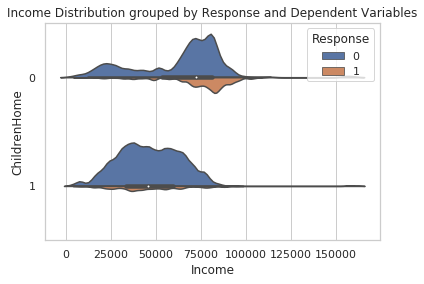

In [82]:
mkt_no_out = mkt[mkt.Income < mkt['Income'].max()]

sns.violinplot(orient='h', x = mkt_no_out['Income'], y = mkt_no_out['ChildrenHome'], hue = mkt_no_out['Response'], split = True, bw= 0.1, scale = 'count').\
    set(title= 'Income Distribution grouped by Response and Dependent Variables')

plt.savefig('.//images//Income_Response_ChildrenHome_Violinplot.png')

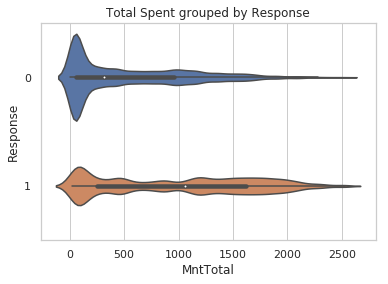

In [83]:
sns.violinplot(orient='h', x = mkt_no_out['MntTotal'], y = mkt_no_out['Response'], split = True, bw= 0.1).set(title ='Total Spent grouped by Response')
plt.savefig('.//images//TotalSpent_Response_Violinplot.png')

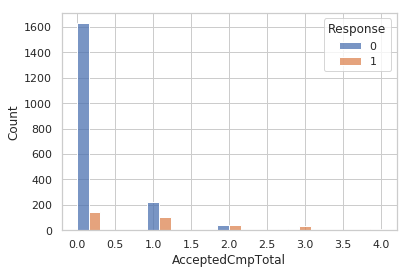

In [84]:
sns.histplot(data = mkt_no_out, x = 'AcceptedCmpTotal', hue ='Response', multiple='dodge')

### Education

In [86]:
edu = ['Basic', 'Graduation', 'Master', 'PhD']

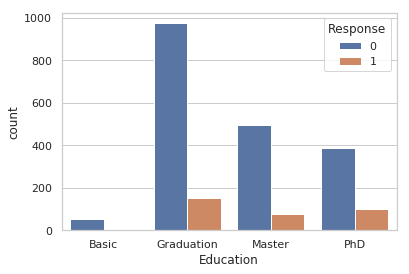

In [87]:
sns.countplot(order=edu, data=mkt_no_out, x='Education', hue='Response')
plt.savefig('.//images//Education.png')

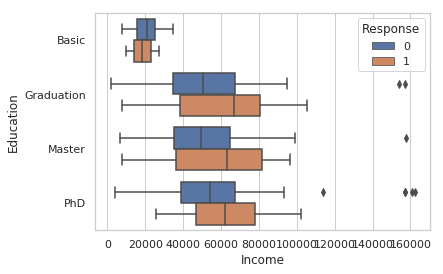

In [89]:
sns.boxplot(order=edu, orient='h', data = mkt_no_out, x = 'Income', y = 'Education', hue = 'Response')
plt.savefig('.//images//Income_Education.png')

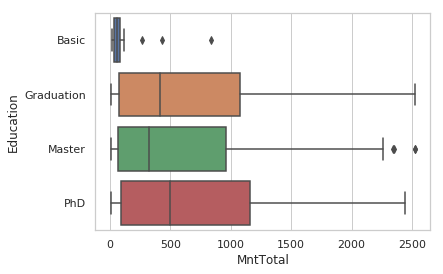

In [90]:
sns.boxplot(order=edu, orient='h', data = mkt_no_out, x = 'MntTotal', y = 'Education')
plt.savefig('.//images//TotalSpent_Education.png')

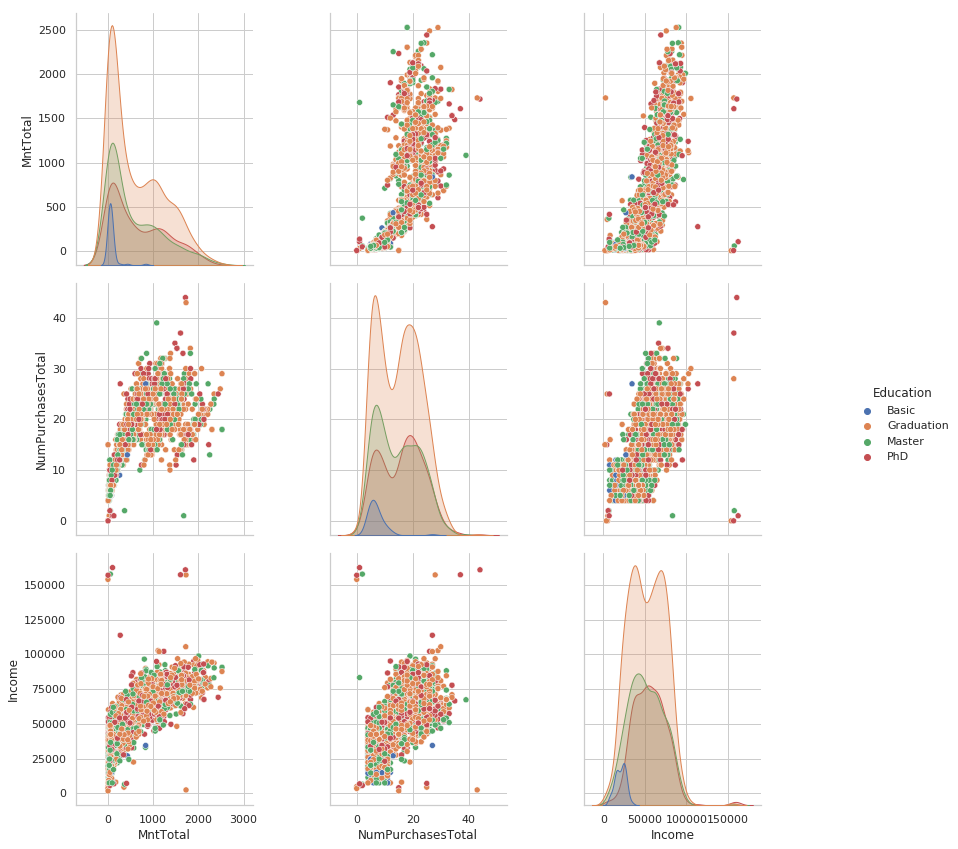

In [91]:
g = sns.pairplot(mkt_no_out[['Education', 'MntTotal', 'NumPurchasesTotal', 'Income']], hue = 'Education', height=4, hue_order=edu)
g


In [92]:
mkt_no_out.head()

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTotal,Year_Joined,Recency,Complain,...,Teenhome,ChildrenHome,Country,Country_SP,Education,Education_Enc,Marital_Status,Marital_Married,Marital_Single,Marital_Together
0,1,0,0,0,0,0,0,2014,0,0,...,0,0,SP,1,Graduation,1,Divorced,0,0,0
1,1,0,1,0,0,0,1,2014,0,0,...,0,0,CA,0,Graduation,1,Single,0,1,0
2,0,0,0,0,0,0,0,2014,0,0,...,1,1,US,0,Graduation,1,Married,1,0,0
3,0,0,0,0,0,0,0,2014,0,0,...,1,1,AUS,0,Graduation,1,Together,0,0,1
4,1,0,0,1,0,0,1,2014,0,0,...,0,1,SP,1,Graduation,1,Single,0,1,0


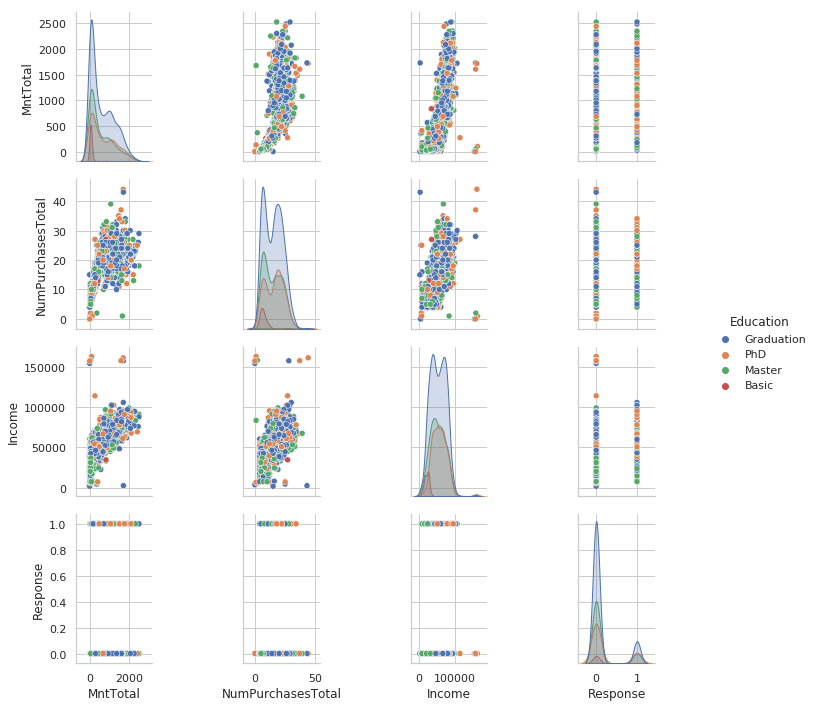

In [107]:
sns.pairplot(mkt_no_out[['Education', 'MntTotal', 'NumPurchasesTotal', 'Income', 'Response']], hue='Education')
plt.savefig('.//images//groupedbyEducation.png')

Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [97]:

def RFC(df = mkt, n_estimators = 100, max_depth = None, min_samples_split = 2, min_samples_leaf = 1):
    X = df.drop(['Response'] + cats, axis = 1)
    y = df['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)

    preds = clf.predict(X_test)
    feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

    print('Training accuracy score: {0:0.4f}'.format(clf.score(X_train, y_train)))
    print('Testing accuracy score: {0:0.4f}'.format(clf.score(X_test, y_test)))
    print(f'Top 5 features: \n{feature_scores[0:5].round(4)}')
    return clf, preds, feature_scores

In [98]:
baseline, baseline_preds, baseline_feats = RFC(mkt)

Training accuracy score: 0.9949
Testing accuracy score: 0.8884
Top 5 features: 
Recency             0.0804
MntTotal            0.0685
Income              0.0674
AcceptedCmpTotal    0.0666
MntMeatProducts     0.0631
dtype: float64


In [99]:
from sklearn.model_selection import validation_curve

X = mkt.drop(['Response'] + cats, axis = 1)
y = mkt['Response']


## Visual Parameter Tuning


In [100]:
def val_curves(X, y, param_names, param_range):
    X = mkt.drop(['Response'] + cats, axis = 1)
    y = mkt['Response']

    for param, rnge in zip(param_names, list(param_range)):

        train_scoreNum, test_scoreNum = np.mean(
                                        validation_curve(
                                        RandomForestClassifier(n_estimators=30),
                                        X = X, y = y,
                                        param_name = param,
                                        param_range = rnge,
                                        cv = 5),
                                        axis=2)


        plt.plot(rnge, train_scoreNum, label = 'Training Accuracy')

        plt.plot(rnge, test_scoreNum, label = 'Testing Accuracy')
        ax = plt.gca()
        bests=[]

        for i in np.argsort(test_scoreNum)[-5:]:
            ax.plot(rnge[i], test_scoreNum[i], 'gx')
            bests.append((rnge[i], train_scoreNum[i].round(3), test_scoreNum[i].round(3)))

        print(f'Best 5 \'{param}\' values and train/test accuracy score: {bests}')
        plt.xlabel(f'{param}')
        plt.ylabel('Accuracy')
        plt.title(f'Random Forest Validation Curve for {param} - cv = 5')
        plt.legend()
        plt.show()
        plt.savefig('.//images//visual_parameter_tuning.png')



Best 5 'n_estimators' values and train/test accuracy score: [(60, 0.995, 0.719), (15, 0.992, 0.72), (40, 0.994, 0.722), (65, 0.995, 0.724), (90, 0.995, 0.725)]


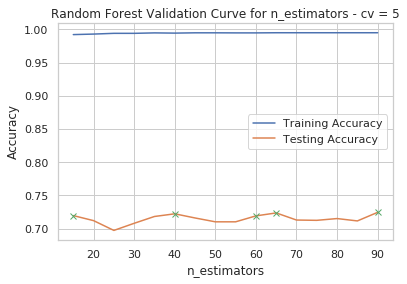

Best 5 'max_depth' values and train/test accuracy score: [(35, 0.994, 0.715), (15, 0.993, 0.715), (40, 0.994, 0.717), (25, 0.994, 0.718), (5, 0.904, 0.725)]


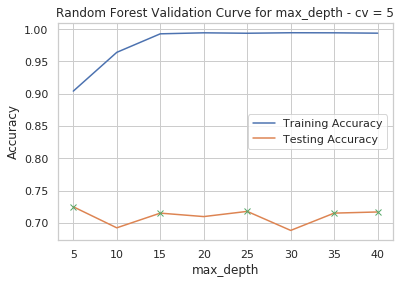

Best 5 'min_samples_split' values and train/test accuracy score: [(2, 0.994, 0.712), (26, 0.924, 0.714), (6, 0.978, 0.716), (22, 0.93, 0.716), (14, 0.947, 0.722)]


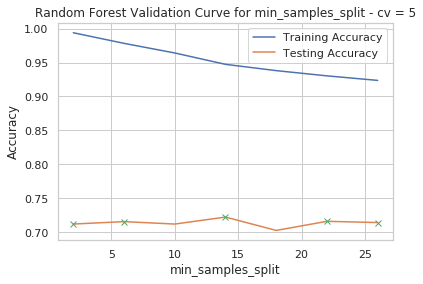

Best 5 'min_samples_leaf' values and train/test accuracy score: [(7, 0.918, 0.721), (10, 0.907, 0.722), (9, 0.909, 0.722), (8, 0.916, 0.725), (5, 0.935, 0.727)]


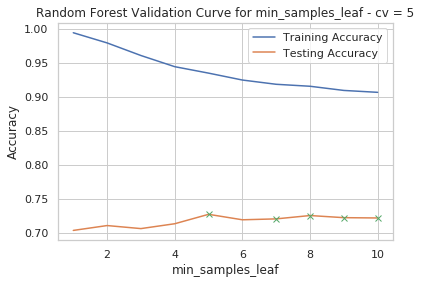

<Figure size 432x288 with 0 Axes>

In [101]:
X = mkt.drop(['Response'] + cats, axis = 1)
y = mkt['Response']
param_names = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']
param_range = [range(15,95,5), range(5,45,5), range(2,30,4), range(1,11,1)]

val_curves(X, y, param_names,param_range)

Using these visual guides,
 n_estimators = 60
 max_depth = 30
 min_samples_split = 10
 min_samples_leaf = 7
appear to be optimal parameters.


## Random Grid Search

In [102]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = range(20,210,5)
max_depth = range(5,75,5)
min_samples_split = range(2,30,4)
min_samples_leaf = range(4,13,1)
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

X = mkt.drop(['Response'] + cats, axis = 1)
y = mkt['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [103]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.7min finished


{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 15,
 'bootstrap': False}

## Comparison


In [104]:
baseline, baseline_preds, baseline_feats = RFC(mkt)

Training accuracy score: 0.9968
Testing accuracy score: 0.8914
Top 5 features: 
Recency            0.0893
MntWines           0.0690
MntTotal           0.0615
MntMeatProducts    0.0610
Income             0.0602
dtype: float64


In [105]:
visual_model, visual_preds, visual_feats = RFC(mkt, n_estimators=60, max_depth=30, min_samples_split=10, min_samples_leaf=7)

Training accuracy score: 0.9101
Testing accuracy score: 0.8735
Top 5 features: 
Recency             0.0957
AcceptedCmpTotal    0.0837
MntMeatProducts     0.0736
AcceptedCmp5        0.0726
MntTotal            0.0719
dtype: float64


In [106]:
gridsearch_model, gridsearch_preds, gridsearch_feats = RFC(mkt, n_estimators=50, max_depth=20, min_samples_split=2, min_samples_leaf=5)

Training accuracy score: 0.9305
Testing accuracy score: 0.8750
Top 5 features: 
Recency             0.1186
AcceptedCmpTotal    0.0963
Income              0.0651
MntMeatProducts     0.0590
AcceptedCmp5        0.0536
dtype: float64
